Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [10]:
library('tidymodels')
library('tidyverse')


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ stringr   1.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ stringr::fixed()    masks recipes::fixed()
✖ dplyr::lag()        masks stats::lag()
✖ readr::spec()       masks yardstick::spec()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [5]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [6]:
glimpse(diabetes_train)



Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 10, 10, 1, 3, 8, 1, 13, 5, 5, 3, 6, …
$ Glucose                  <dbl> 85, 89, 116, 115, 139, 103, 126, 99, 97, 145,…
$ BloodPressure            <dbl> 66, 66, 74, 0, 80, 30, 88, 84, 66, 82, 92, 75…
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 38, 41, 0, 15, 19, 0, 26, 11…
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 83, 235, 0, 140, 110, 0, 0, 5…
$ BMI                      <dbl> 26.6, 28.1, 25.6, 35.3, 27.1, 43.3, 39.3, 35.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.134, 1.441, 0.183, 0.7…
$ Age                      <dbl> 31, 21, 30, 29, 57, 33, 27, 50, 22, 57, 38, 6…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

In [ ]:
Glucose column can be considered as Outcome

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BMI : Body mass index (weight in kg/(height in m)^2)

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

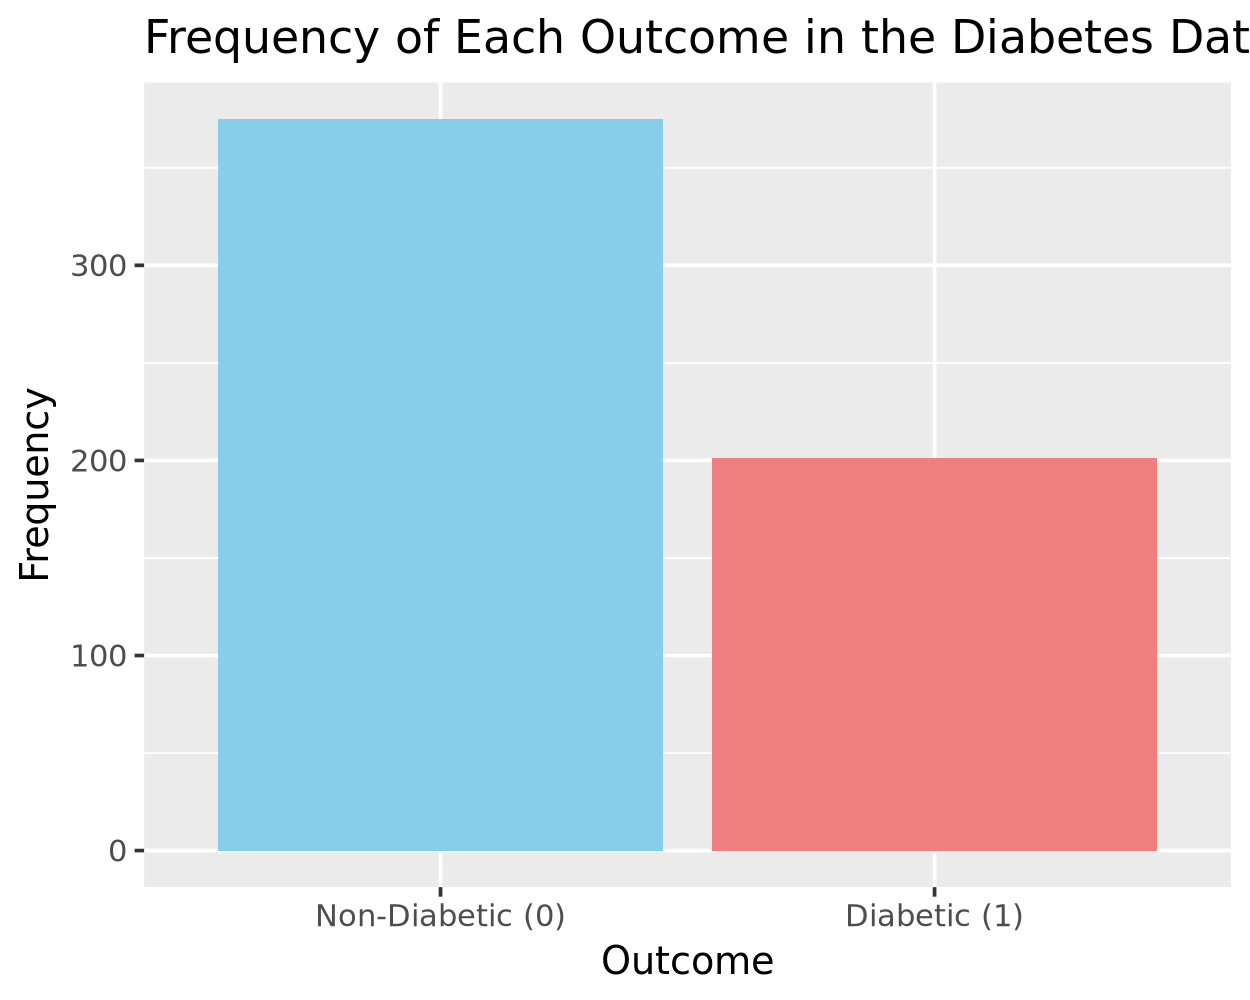

In [7]:
# Check if 'Outcome' column exists
if ("Outcome" %in% colnames(diabetes_train)) {
  
  # Create a bar plot using ggplot2
  ggplot(diabetes_train, aes(x = factor(Outcome))) +
    geom_bar(fill = c("skyblue", "lightcoral")) +
    labs(x = "Outcome", y = "Frequency", 
         title = "Frequency of Each Outcome in the Diabetes Dataset") +
    scale_x_discrete(labels = c("0" = "Non-Diabetic (0)", "1" = "Diabetic (1)"))
  
} else {
  print("The 'Outcome' column was not found in the dataset.")
}

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

No, the data is not balanced.



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [8]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

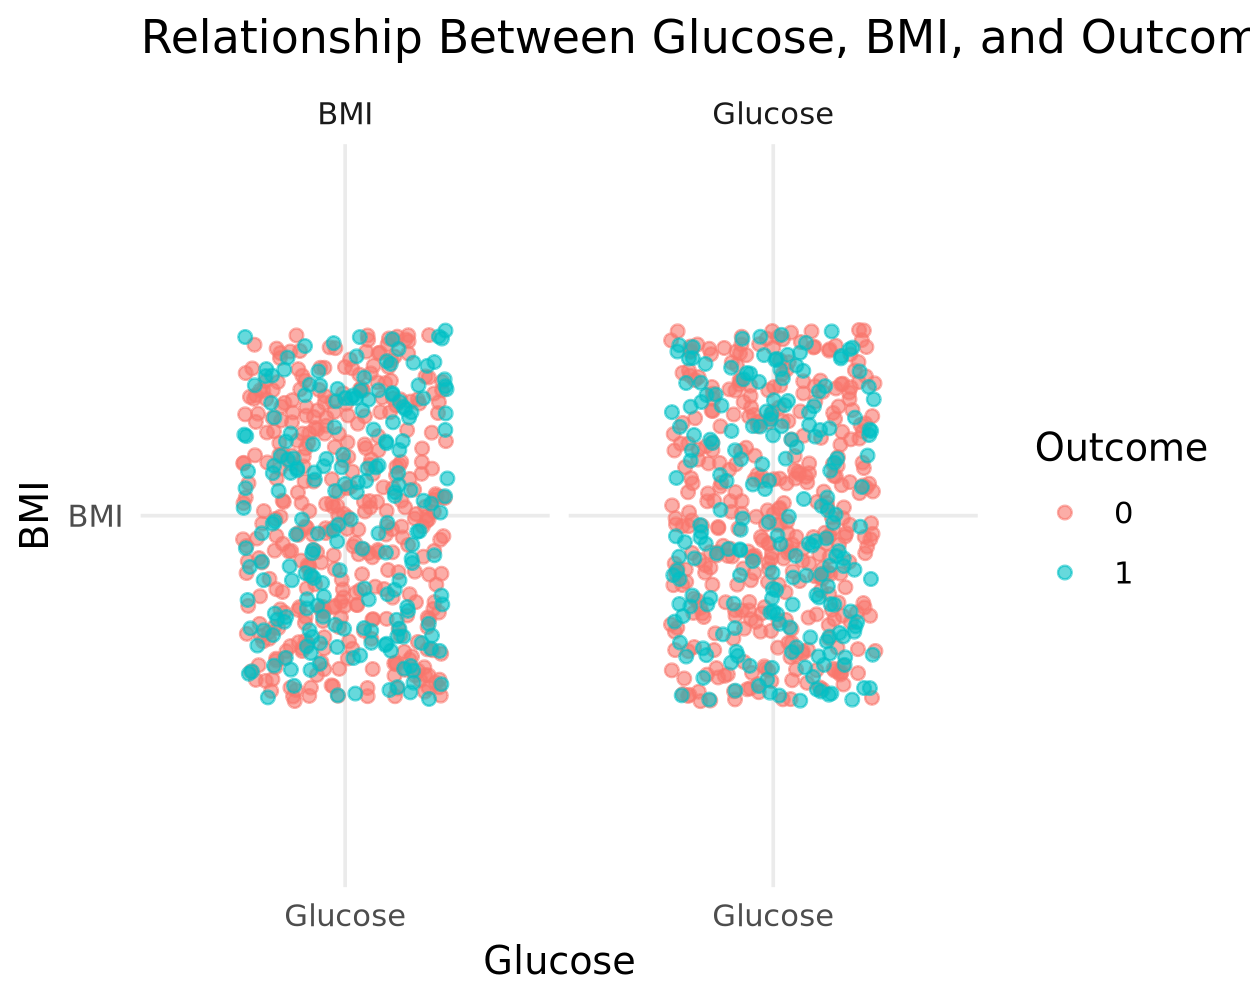

In [16]:
# Create a jitter plot to visualize the relationship between Glucose, BMI, and Outcome
ggplot(plot_df, aes(x = 'Glucose', y = 'BMI', color = factor(Outcome))) +
  geom_jitter(width = 0.3, height = 0.3, alpha = 0.6) +
  facet_wrap(~name, ncol = 2, scales = 'free_x') +
  labs(x = "Glucose", y = "BMI", color = "Outcome",
       title = "Relationship Between Glucose, BMI, and Outcome") +
  theme_minimal()



❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

removing the scales = 'free_x' argument forces all facets to use the same x-axis scale

removing the scales = 'free_x' argument forces all facets to use the same x-axis scale, which can be useful for direct comparison but might reduce clarity if the data ranges are very different across facets.Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [26]:



logistic_model <- glm(Outcome ~ name + value, 
                      data = plot_df, 
                      family = binomial)
# Print a summary of the model to examine the coefficients and model fit
summary(logistic_model)



Call:
glm(formula = Outcome ~ name + value, family = binomial, data = plot_df)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.051283   0.155276  -13.21   <2e-16 ***
nameGlucose -4.041344   0.386617  -10.45   <2e-16 ***
value        0.043981   0.003886   11.32   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1490.2  on 1151  degrees of freedom
Residual deviance: 1304.5  on 1149  degrees of freedom
AIC: 1310.5

Number of Fisher Scoring iterations: 4


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [34]:


diabetes_test_clean <- diabetes_test[, c("BMI", "Glucose")]

# Add the predictions to the cleaned test dataset using augment
diabetes_test_wPred <- augment(logistic_model, newdata = diabetes_test_clean)

# View the first few rows of the dataset with predictions
head(diabetes_test_wPred)

ERROR: Error in eval(predvars, data, env): object 'name' not found


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [35]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

ERROR: Error in eval(expr, envir, enclos): object 'mod_fit' not found


❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**